# Cycling data Part I: 
# Converting fit file and reading it into a Pandas dataframe and show some graphs 


## Contents

0. Install fitparse and import the python librarie
1. Import the .fit file and read into a pandas dataframe
2. Check the data
3. Clean the data
4. Show in graphs

In sports technology the .fit file is a standard originally developed by Garmin but now used as an open standard. 
You can find the .fit file of your activity on your device or download it from your online account. 

Upload this file to a Jupyter Notebook. In step 1 we will use this file.

## 0. Install fitparse and import the python libraries

We use the fitparse library to parse the .fit file.

Please find the github of fitparse project here: http://dtcooper.github.io/python-fitparse/

In [1]:
!pip install fitparse 

In [2]:
#import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fitparse

## 1. import the .fit file and read it into a Pandas dataframe

Source: https://github.com/mcandocia/examples/tree/master/convert_fit_to_csv

This script will convert all .fit files in a certain directory to csv files.

Three csv files will be generated:
- A csv file with start / stop times
- A csv file with all the laps (mostly is just 1 lap)
- A csv file with datapoints.


In [3]:
#source: http://johannesjacob.com/
from fitparse import FitFile
import pandas as pd
import matplotlib.pyplot as plt

fitfile = FitFile('38FEB41F.fit') ### enter the name of the file here!

while True:
    try:
        fitfile.messages
        break
    except KeyError:
        continue
workout = []
for record in fitfile.get_messages('record'):
    r = {}
    for record_data in record:
        r[record_data.name] = record_data.value
    workout.append(r)
fietsdata = pd.DataFrame(workout)

In [4]:
fietsdata.head() # print the first five rows of the dataframe

,accumulated_power,altitude,cadence,calories,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,left_pedal_smoothness,left_right_balance,left_torque_effectiveness,position_lat,position_long,power,right_pedal_smoothness,right_torque_effectiveness,speed,temperature,timestamp
0,35816.0,2465.0,58.0,0.0,0.0,-7.0,5.195,None,121.0,None,None,None,624670577.0,58010553.0,202.0,None,None,5195.0,21,2020-04-19 07:39:12
1,35963.0,2465.0,61.0,0.0,10.0,-7.0,4.804,None,121.0,None,None,None,624670796.0,58011369.0,147.0,None,None,4804.0,21,2020-04-19 07:39:13
2,36145.0,2465.0,64.0,0.0,10.0,-7.0,5.273,None,122.0,None,None,None,624670994.0,58012243.0,239.0,None,None,5273.0,21,2020-04-19 07:39:14
3,36145.0,2465.0,66.0,0.0,21.0,-7.0,5.859,None,123.0,None,None,None,624671313.0,58013138.0,193.0,None,None,5859.0,21,2020-04-19 07:39:15
4,36787.0,2460.0,67.0,0.0,21.0,-8.0,5.530,None,123.0,None,None,None,624671611.0,58014033.0,210.0,None,None,5530.0,21,2020-04-19 07:39:16


## 2. Check the data

In [5]:
# see the datatypes
print(fietsdata.dtypes)

accumulated_power                    float64
altitude                             float64
cadence                              float64
calories                             float64
distance                             float64
enhanced_altitude                    float64
enhanced_speed                       float64
grade                                 object
heart_rate                           float64
left_pedal_smoothness                 object
left_right_balance                    object
left_torque_effectiveness             object
position_lat                         float64
position_long                        float64
power                                float64
right_pedal_smoothness                object
right_torque_effectiveness            object
speed                                float64
temperature                            int64
timestamp                     datetime64[ns]
dtype: object


In [6]:
# do basic analysis of some of the data 
print(fietsdata[['power', 'heart_rate', 'enhanced_speed', 'cadence']].describe())

             power   heart_rate  enhanced_speed      cadence
count  8777.000000  8794.000000     8796.000000  8777.000000
mean    174.438419   159.013987        7.001387    75.500741
std      74.162221     6.472077        1.182836    14.859377
min       0.000000   114.000000        0.000000     0.000000
25%     142.000000   156.000000        6.523000    72.000000
50%     169.000000   160.000000        7.099000    78.000000
75%     201.000000   163.000000        7.680000    83.000000
max     725.000000   183.000000       10.345000   186.000000


## 3.Data cleaning

In [7]:
# for this file no data to clean

## 4. Show data in graphs

### 4a.  basic scatter plot of speed vs distance

<IPython.core.display.Javascript object>


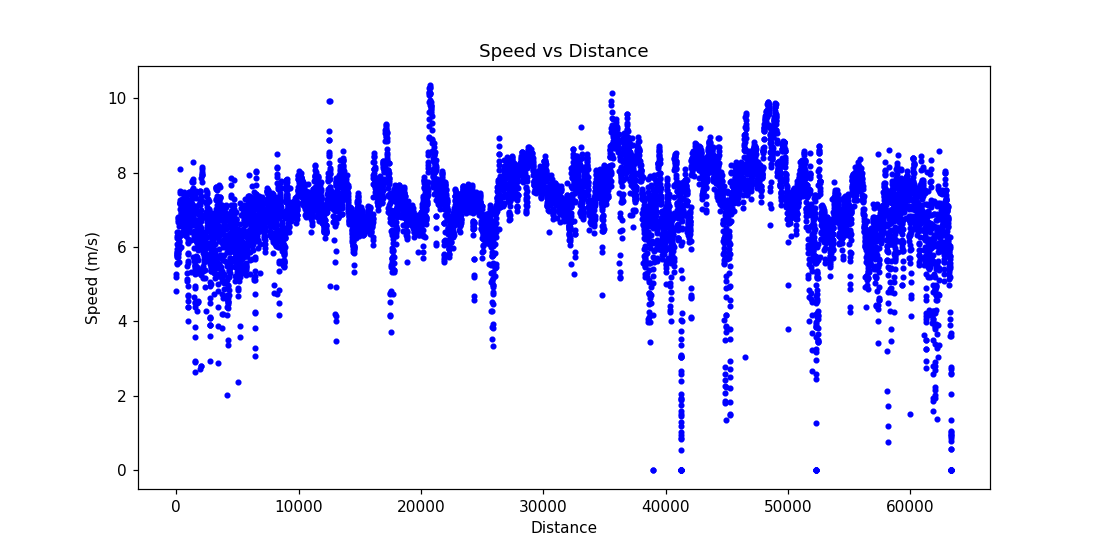

Text(0.5, 1.0, 'Speed vs Distance')

In [9]:
%matplotlib notebook
# We use matplotlib to make a scatter of distance vs speed

plt.figure(figsize=(10,5))#use this to set size of figure

### Set the variables ####
x = fietsdata.distance #x-values: column distance
s = fietsdata.enhanced_speed #y values: column speed

### Plot the scatter with labels and title ###
plt.scatter(x,s,c='blue', marker=".") #make the scatter
# scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, \*, plotnonfinite=False, data=None, \*\*kwargs)
plt.xlabel('Distance')
plt.ylabel('Speed (m/s)')
plt.title('Speed vs Distance')
#plt.legend() 

### 4b. Speed and heart rate

<IPython.core.display.Javascript object>


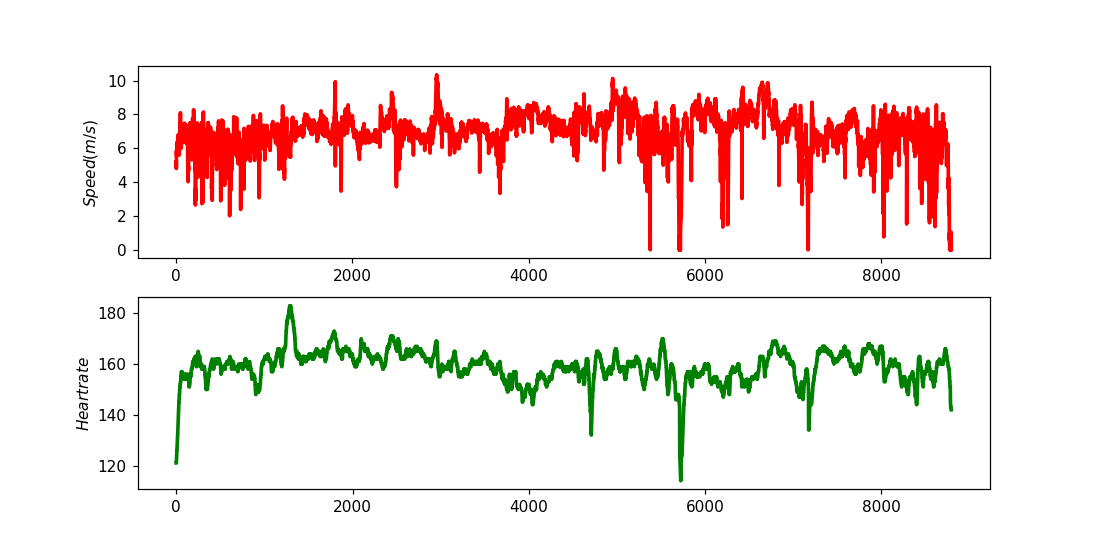

Text(0, 0.5, '$Heart rate$')

In [15]:
%matplotlib notebook
#source: https://www.youtube.com/watch?v=gMOqRdsbbr8
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))#use this to set size of figure

# timestamp', 'position_lat', 'position_long', 'distance',
#'enhanced_altitude', 'altitude', 'enhanced_speed', 'speed',
# 'heart_rate', 'cadence', 'fractional_cadence', 'temperature'

######## use numpy to create sin and cos functions ###########
#x = fietsdata.distance #x-values: column distance
s = fietsdata.enhanced_speed
h = fietsdata.heart_rate #y values: column speed


####### make the subplots ##########
plt.subplot(2,1,1) 
plt.plot(s, color='red', linewidth=2.4)
plt.ylabel(r'$Speed (m/s)$') # y label

plt.subplot(2,1,2)
plt.plot(h, color='green', linewidth=2.4)
plt.ylabel(r'$Heart rate$') # y label

### 4c. Cadence and Power

<IPython.core.display.Javascript object>


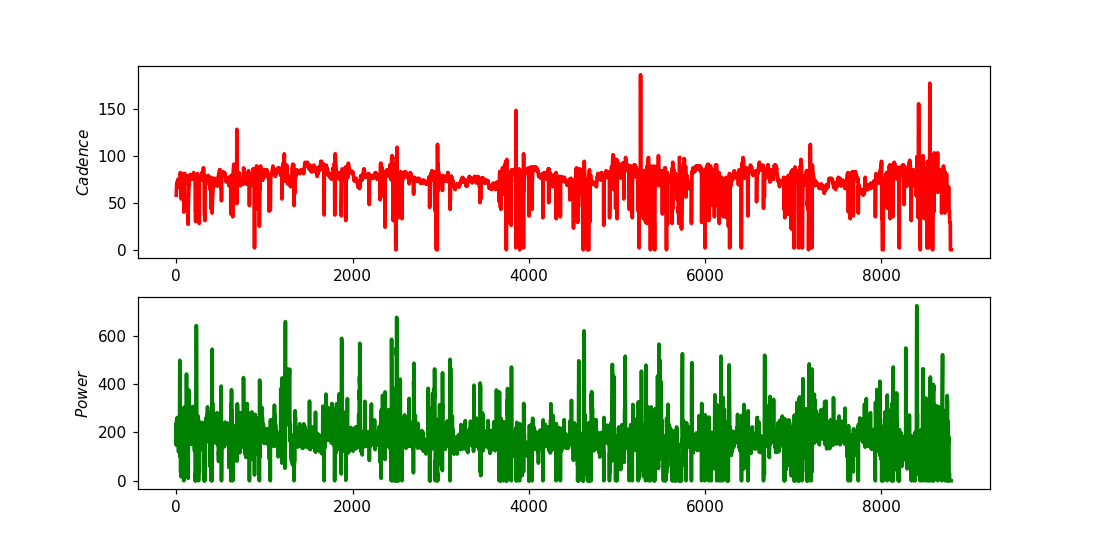

Text(0, 0.5, '$Power$')

In [14]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))#use this to set size of figure


# timestamp', 'position_lat', 'position_long', 'distance',
#'enhanced_altitude', 'altitude', 'enhanced_speed', 'speed',
# 'heart_rate', 'cadence', 'fractional_cadence', 'temperature'
######## write the data to a variable ###########

#h = fietsdata.heart_rate #y values: column speed
#y = fietsdata.speed
c = fietsdata.cadence
p = fietsdata.power

####### make the subplots ##########
plt.subplot(2,1,1) 
plt.plot(c, color='red', linewidth=2.4)
plt.ylabel(r'$Cadence$') # y label

plt.subplot(2,1,2)
plt.plot(p, color='green', linewidth=2.4)
plt.ylabel(r'$Power$') # y label

### 4d. Histogram of cadence, bpm and power

<IPython.core.display.Javascript object>


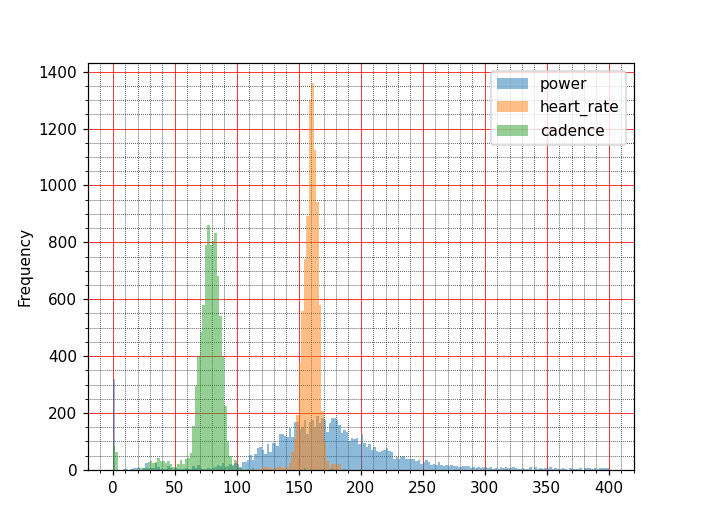

In [12]:
fig, ax = plt.subplots()
fietsdata[['power', 'heart_rate', 'cadence']].plot.hist(bins=200, alpha=0.5, range=(0, 400), ax=ax)
ax.legend()
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()